In [1]:
#!/usr/bin/env python3
from shapely import LinearRing, Polygon

inp = "input.txt"

with open(inp, "r") as f:
    pnts = [tuple(int(x) for x in line.strip().split(",")) for line in f]
ring = Polygon(LinearRing(pnts))

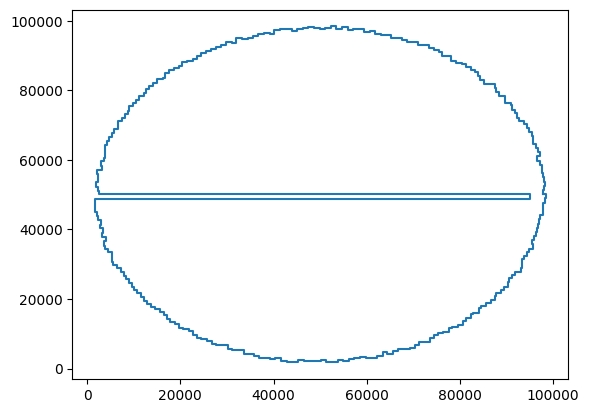

In [2]:
import matplotlib.pyplot as plt
plt.plot(*ring.exterior.xy)


part2 1574684850


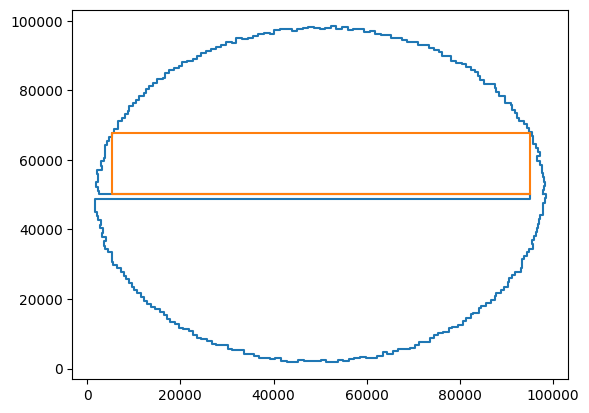

In [ ]:
from itertools import combinations
from shapely import box
l = 0


def inthebox(ax,ay,bx,by):
    xmin, xmax = min(ax, bx), max(ax, bx)
    ymin, ymax = min(ay, by), max(ay, by)
    for i, (px,py) in enumerate(pnts):
        if ((px,py) != (ax,ay) and (px,py) != (bx,by)) and (
            xmin < px < xmax and ymin < py < ymax
        ) or (pnts[i-1][0] != px and ymin < py < ymax and ((pnts[i-1][0] <= xmin and px >= xmax) or (px <= xmin and pnts[i-1][0] >= xmax))) or (
            pnts[i-1][1] != py and xmin < px < xmax and ((pnts[i-1][1] <= ymin and py >= ymax) or (py <= ymin and pnts[i-1][1] >= ymax))
        ):
            return True
            
    return False


for (ax, ay), (bx, by) in combinations(pnts, 2):
    #if (ay < 50114 and by > 48652) or (by < 50114 and ay > 48652):
    #    continue
    s = (1 + abs(ax - bx)) * (1 + abs(ay - by))
    if inthebox(ax,ay,bx,by):
        continue
    if s > l:
        l = s
        m = ((ax, ay), (bx, by))

print("part2", l)
plt.plot(*ring.exterior.xy)
(ax, ay), (bx, by) = m
xmin, xmax = min(ax, bx), max(ax, bx)
ymin, ymax = min(ay, by), max(ay, by)
b = box(xmin, ymin, xmax, ymax)
plt.plot(*b.exterior.xy)